In [31]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [32]:
champagne= pd.read_csv('perrin-freres-monthly-champagne.csv', index_col='Month', parse_dates=True, skipfooter=2)
champagne.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [33]:
#rename the column of sales to a simpler name for ease of use ahead
champagne.columns=['Sales']
champagne.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


<AxesSubplot:xlabel='Month'>

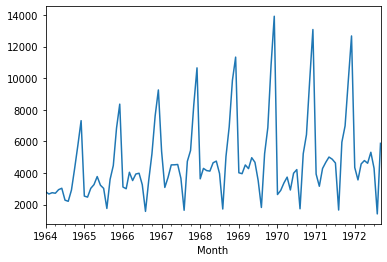

In [34]:
champagne['Sales'].plot()

We can see that the above time series data has both trend and seasonality. 

In [35]:
#setting the appropriate frequency for the dates
champagne.index.freq= 'MS' #MS refers to start of each month. 


### Splitting the dataset into train and test sets (for this dataset only. Later we use the TimeSeriesSplit() function from sklearn)

In [36]:
N_test= 12
train= champagne.iloc[:-N_test] #keep all rows in the training set except the last 12 data points
test= champagne.iloc[-N_test:] #last 12 rows will be used as the test set

In [37]:
#boolean series to index data frame rows
train_idx= champagne.index <= train.index[-1]
test_idx= champagne.index > train.index[-1]


In [38]:
holt_winters= ExponentialSmoothing(train['Sales'], initialization_method='legacy-heuristic',
trend='add',seasonal= 'add', seasonal_periods= 12)
result_hw=holt_winters.fit()

#this will find the best alpha such that the SSE are minimized over the train set. 

<AxesSubplot:xlabel='Month'>

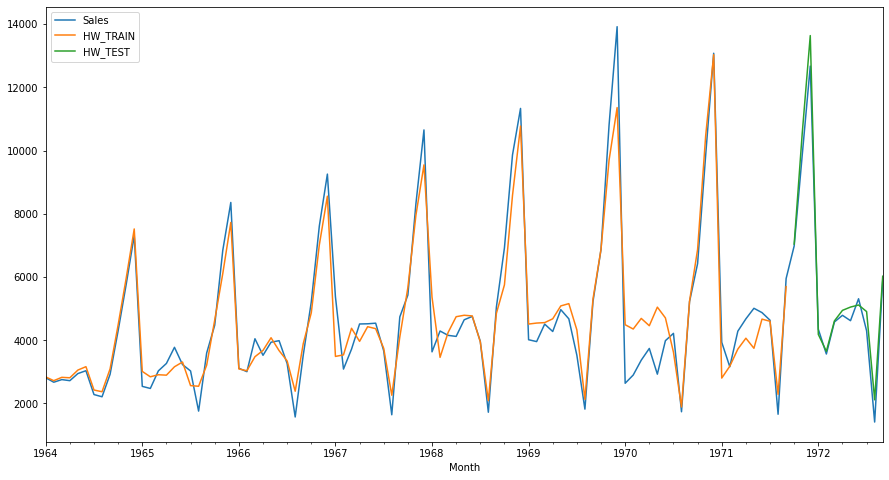

In [43]:
# load the predicted values in the data set
champagne.loc[train_idx, 'HW_TRAIN']= result_hw.fittedvalues #predicted values
champagne.loc[test_idx, 'HW_TEST']= result_hw.forecast(N_test) #forecast on test set for the next 12 months. 

champagne[['Sales','HW_TRAIN','HW_TEST']].plot(figsize=(15, 8))


In [47]:
print('Train R2 error= ',r2_score(train['Sales'], result_hw.fittedvalues))
print('Test R2 error= ',r2_score(test['Sales'], result_hw.forecast(N_test)))

Train R2 error=  0.9173433327953875
Test R2 error=  0.9735808965342739
